## Import Library 

In [ ]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_data_path = "/content/drive/MyDrive/plant data/data/train"
validation_data_path = "/content/drive/MyDrive/plant data/data/val"

Load a dataset from the google drive.In data set there are three floder one is train set and another is test set.In all three floder there four sub floder is there. 1.diseased cotton leaf 2.diseased cotton plant 3.fresh cotton leaf 4.fresh cotton plant

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data = train_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary') 

Found 1951 images belonging to 4 classes.


In [ ]:
for i in os.listdir("/content/drive/MyDrive/plant data/data/train/"):
    print(str(len(os.listdir("/content/drive/MyDrive/plant data/data/train/"+i))) +" "+ i +" images")

427 fresh cotton leaf images
288 diseased cotton leaf images
815 diseased cotton plant images
421 fresh cotton plant images


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [ ]:
for i in os.listdir("/content/drive/MyDrive/plant data/data/val/"):
    print(str(len(os.listdir("/content/drive/MyDrive/plant data/data/val/"+i))) +" "+ i +" images")

101 diseased cotton plant images
55 diseased cotton leaf images
80 fresh cotton leaf images
88 fresh cotton plant images


In [ ]:
model_path = 'test.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])
 
 
model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [26]:
history = model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.4249 
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to test.h5
61/61 [==============================] - 1241s 20s/step - loss: 1.2690 - accuracy: 0.4249 - val_loss: 1.1219 - val_accuracy: 0.4167
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.5177
Epoch 2: val_accuracy improved from 0.41667 to 0.57099, saving model to test.h5
61/61 [==============================] - 124s 2s/step - loss: 1.0995 - accuracy: 0.5177 - val_loss: 0.9673 - val_accuracy: 0.5710
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.6151
Epoch 3: val_accuracy did not improve from 0.57099
61/61 [==============================] - 126s 2s/step - loss: 0.9572 - accuracy: 0.6151 - val_loss: 0.9625 - val_accuracy: 0.5586
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 0.8835 - accuracy: 0.6474
Epoch 4: val_accura

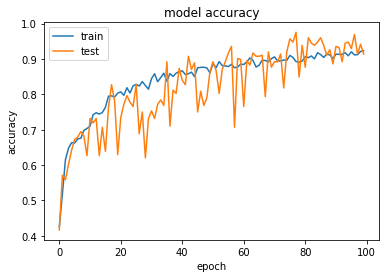

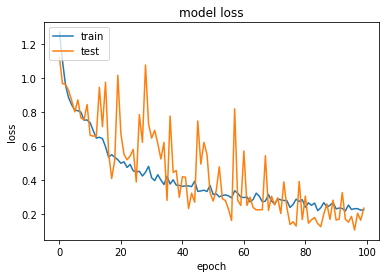

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
from tensorflow import lite
import tensorflow as tf
#converter = tf.lite.TFLiteConverter.from_keras_model('test.h5')
keras_model = tf.keras.models.load_model("test.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
model = converter.convert()
file = open('model.tflite' , 'wb') 
file.write(model)

8118176